In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from math import e
from joblib import dump, load
import statistics as st
from calendar import isleap

In [2]:
# Read Orography
OroData = xr.open_dataset('../../Data/eraDown/ERA5_2degree_Down/DailyMean/ERA5IGP_Orography.nc')
OroD = OroData.sel(latitude=slice(32,24),longitude=slice(74,86))
# create mask
oro = OroD.z
oro.values = OroD.z.values/9.81
oro.attrs
oro.attrs['units']='meter'
oro.attrs['long_name']='Orography'
oro.values[oro.values>500.1]=np.NaN
mask=oro.values/oro.values

In [3]:
AODData = xr.open_dataset('../../Data/CMIP6AerosolData/RegridNHanthrop_iitmesm_1850_2015_historig_AOD550nm.nc')
AODData.time


<xarray.DataArray 'time' (time: 2004)>
array([18490101., 18490201., 18490301., ..., 20151001., 20151101., 20151201.])
Coordinates:
  * time     (time) float64 1.849e+07 1.849e+07 ... 2.015e+07 2.015e+07
Attributes:
    standard_name:  time
    long_name:      initial time
    units:          day as %Y%m%d.%f
    calendar:       standard
    axis:           T

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<xarray.DataArray 'time' (time: 2004)>
array([18490101., 18490201., 18490301., ..., 20151001., 20151101., 20151201.])
Coordinates:
  * time     (time) float64 1.849e+07 1.849e+07 ... 2.015e+07 2.015e+07
Attributes:
    standard_name:  time
    long_name:      initial time
    units:          day as %Y%m%d.%f
    calendar:       standard
    axis:           T
DatetimeIndex(['1849-01-01', '1849-02-01', '1849-03-01', '1849-04-01',
               '1849-05-01', '1849-06-01', '1849-07-01', '1849-08-01',
               '1849-09-01', '1849-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', length=2004, freq=None)
<xarray.DataArray 'time' (time: 2004)>
array(['1849-01-01T00:00:00.000000000', '1849-02-01T00:00:00.000000000',
       '1849-03-01T00:00:00.000000000', ..., '2015-10-01T00:00:00.000000000

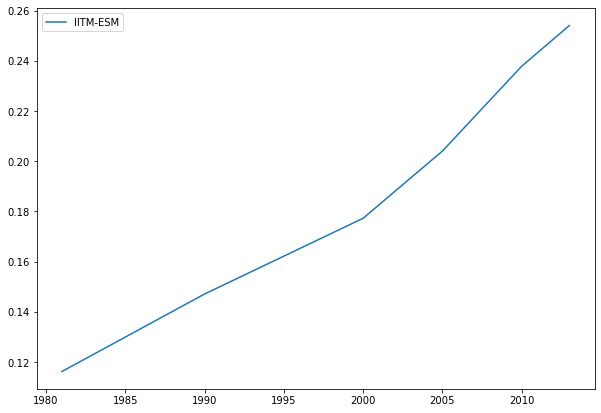

In [4]:
### #JJAS

histAOD=AODData.sel(latitude=slice(32,24),longitude=slice(74,86)).aod_band10
#histAOD[0].values
#histAOD[1].values
histAOD.values=histAOD.values*mask
print(histAOD.time)
t1=pd.to_datetime(histAOD.time, format='%Y%m%d')
print(t1)
histAOD['time']=t1
#histAOD.assign_coords(time=t1)

print(histAOD.time)

# Area Average
aodTS1=histAOD.mean(dim=['latitude','longitude'], skipna=True)

aodTs=(aodTS1[((aodTS1.time.dt.month>5) | (aodTS1.time.dt.month<10)) ].sel(time=slice('1980-1-1','2014-12-31')))
histAODTs=[]
x=np.arange(1981,2014)
for yr in x :
    InDString=np.datetime64(str(yr)+'-06-01')
    EnDString=np.datetime64(str(yr)+'-09-01')
   # print(EnDString)
    aodT=aodTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
    histAODTs.append(aodT.mean())
#AODHistvals.append(histAODTs)

print(aodTs.values)

 
fig = plt.figure(figsize=(10,7))
plt.plot(x,histAODTs,label='IITM-ESM')
plt.legend()

plt.savefig('HistAODJJAS.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DatetimeIndex(['1849-01-01', '1849-02-01', '1849-03-01', '1849-04-01',
               '1849-05-01', '1849-06-01', '1849-07-01', '1849-08-01',
               '1849-09-01', '1849-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', length=2004, freq=None)


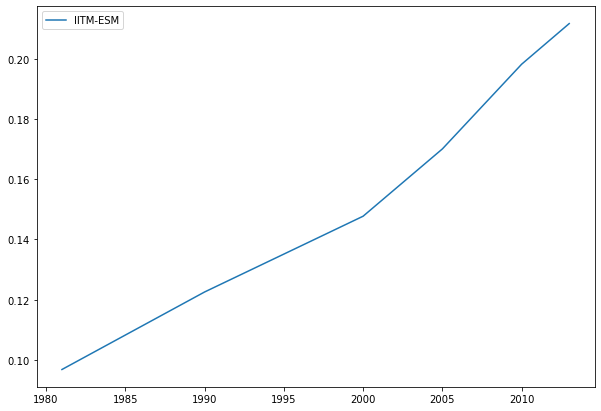

In [5]:
### #January

histAOD=AODData.sel(latitude=slice(32,24),longitude=slice(74,86)).aod_band10
#histAOD[0].values
#histAOD[1].values
histAOD.values=histAOD.values*mask
#print(histAOD.time)
t1=pd.to_datetime(histAOD.time, format='%Y%m%d')
print(t1)
histAOD['time']=t1
#histAOD.assign_coords(time=t1)

#print(histAOD.time)

# Area Average
aodTS1=histAOD.mean(dim=['latitude','longitude'], skipna=True)

aodTs=(aodTS1[((aodTS1.time.dt.month<2)) ].sel(time=slice('1981-1-1','2014-12-31')))

x=np.arange(1981,2014)
histAODTs=[]
x=np.arange(1981,2014)
for yr in x :
    InDString=np.datetime64(str(yr)+'-01-01')
    
   # print(EnDString)
    aodT=aodTs.sel(time=InDString)
   # print(rhT.time)
    histAODTs.append(aodT.mean())
#AODHistvals.append(histAODTs)

#print(aodTs.values)


#aodTs.plot()
 
fig = plt.figure(figsize=(10,7))
plt.plot(x,histAODTs,label='IITM-ESM')
plt.legend()

plt.savefig('HistAODJanuary.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DatetimeIndex(['1849-01-01', '1849-02-01', '1849-03-01', '1849-04-01',
               '1849-05-01', '1849-06-01', '1849-07-01', '1849-08-01',
               '1849-09-01', '1849-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', length=2004, freq=None)


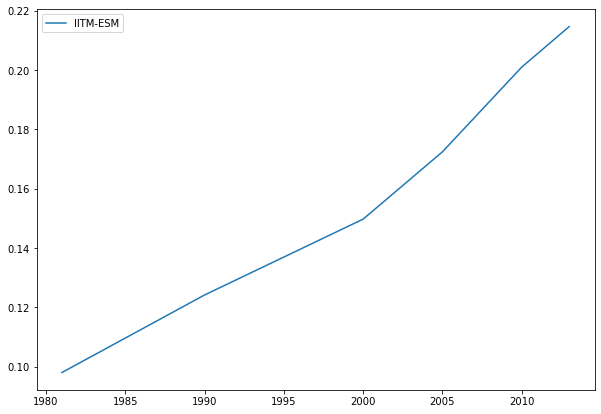

In [6]:
### #December

histAOD=AODData.sel(latitude=slice(32,24),longitude=slice(74,86)).aod_band10
#histAOD[0].values
#histAOD[1].values
histAOD.values=histAOD.values*mask
#print(histAOD.time)
t1=pd.to_datetime(histAOD.time, format='%Y%m%d')
print(t1)
histAOD['time']=t1
#histAOD.assign_coords(time=t1)

#print(histAOD.time)

# Area Average
aodTS1=histAOD.mean(dim=['latitude','longitude'], skipna=True)

aodTs=(aodTS1[((aodTS1.time.dt.month>11)) ].sel(time=slice('1981-12-1','2014-12-31')))

x=np.arange(1981,2014)
histAODTs=[]
x=np.arange(1981,2014)
for yr in x :
    InDString=np.datetime64(str(yr)+'-12-01')
    
   # print(EnDString)
    aodT=aodTs.sel(time=InDString)
   # print(rhT.time)
    histAODTs.append(aodT.mean())
#AODHistvals.append(histAODTs)

#print(aodTs.values)


#aodTs.plot()
 
fig = plt.figure(figsize=(10,7))
plt.plot(x,histAODTs,label='IITM-ESM')
plt.legend()

plt.savefig('HistAODDecember.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


DatetimeIndex(['1849-01-01', '1849-02-01', '1849-03-01', '1849-04-01',
               '1849-05-01', '1849-06-01', '1849-07-01', '1849-08-01',
               '1849-09-01', '1849-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', length=2004, freq=None)


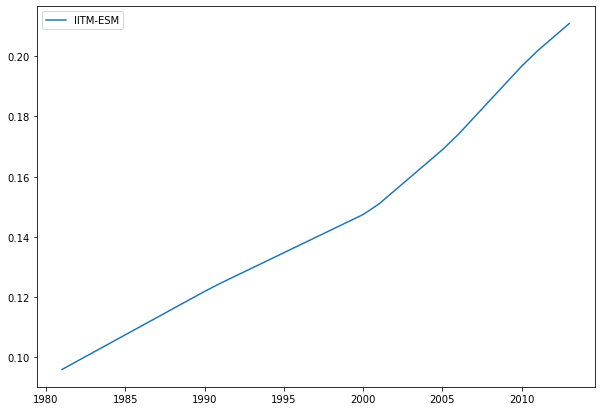

In [7]:
# DecJanTogether
histAOD=AODData.sel(latitude=slice(32,24),longitude=slice(74,86)).aod_band10
#histAOD[0].values
#histAOD[1].values
histAOD.values=histAOD.values*mask
#print(histAOD.time)
t1=pd.to_datetime(histAOD.time, format='%Y%m%d')
print(t1)
histAOD['time']=t1
#histAOD.assign_coords(time=t1)

#print(histAOD.time)

# Area Average
aodTS1=histAOD.mean(dim=['latitude','longitude'], skipna=True)

aodTs=(aodTS1[((aodTS1.time.dt.month>11) | (aodTS1.time.dt.month<2)) ].sel(time=slice('1980-12-1','2014-1-31')))
histAODTs=[]
for yr in x :
    InDString=np.datetime64(str(yr-1)+'-12-01T00:00:00')
    EnDString=np.datetime64(str(yr)+'-01-31T00:00:00')
   # print(EnDString)
    aodT=aodTs.sel(time=slice(InDString,EnDString))
   # print(rhT.time)
    histAODTs.append(aodT.mean())
#AODHistvals.append(histAODTs)

#print(aodTs.values)


#aodTs.plot()
 
fig = plt.figure(figsize=(10,7))
plt.plot(x,histAODTs,label='IITM-ESM')
plt.legend()

plt.savefig('HistAODDecemberJanuary.eps')
